In [1]:
import torch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

import seaborn as snsm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import networkx as nx

from collections import Counter

import math, random

import json

from typing import Sequence, Optional, Callable, List

In [2]:
def DicToJson(dic: dict, path: str):
    """
    Save dict to json file
    
    Args :
        dic : dict
        path : str
    """
    with open(path, "w", encoding="utf-8") as f:
        json.dump(dic, f, ensure_ascii=False, indent=4)


def JsonToDic(path: str) -> dict:
    """
    Load a json file into a dict
    
    Args :
        path : str
    
    Returns :
        dict
    """
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)


In [ ]:
# def interactive_embedding_plot_3D(W:np.ndarray,
#                                 encoder:dict,
#                                 decoder:dict,
#                                 words: Optional[Sequence[str]] = None,
#                                 method_graph: Optional[PCA|TSNE] = None,
#                                 method_cluster: Optional[KMeans] = None,
#                                 normalize_cluster:bool=True,
#                                 query_words: Optional[List[str]|str] = None,
#                                 top_k_neighbors: int = 10,
#                                 show_only: Optional[Sequence[str]] = None,
#                                 title: Optional[str] = None):
#     """
#     Trace un scatter interactif (Plotly) des embeddings.
#     - embedding: nn.Embedding (poids seront copiés en cpu)
#     - encoder: dict word -> idx
#     - words: séquence de mots à afficher (par défaut tous les mots de encoder)
#     - method: 'pca' ou {"perplexity": 30, "n_iter": 1000, "init": "pca", "learning_rate": 200}
#     - tsne_params: dict de paramètres passés à TSNE si method == 'tsne'
#     - top_k_neighbors: nombre de voisins affichés si query_word spécifié
#     - query_word: si fourni, on le met en évidence et on affiche ses k voisins les plus proches
#     - show_only: si fourni, restreint l'affichage à cette liste de mots
#     - title: titre du graphique
#     Retour: Plotly Figure (affiche inline si en notebook)
#     """
#     # Préparer la liste de mots à afficher
#     if words is None:
#         words = list(encoder.keys())
#     words = list(words)

#     if show_only is not None:
#         show_set = set(show_only)
#         words = [w for w in words if w in show_set]

#     # Construire la matrice d'embeddings [N, D]
#     idxs = [encoder[w] for w in words]


#     # Réduction de dimension
#     if method_graph is None:
#         X = W
#     else:
#         X = method_graph.fit_transform(W)

#     # Construire dataframe-like arrays
#     xs = X[:,0]
#     ys = X[:,1]
#     zs = X[:,2]
#     labels = words

#     words_cluster = None
#     if method_cluster is not None:
#         w_norm = W
#         if normalize_cluster:
#             w_norm = normalize(W)
#         method_cluster.fit(w_norm)
#         words_cluster = method_cluster.labels_

    
#     fig:go.Figure = px.scatter_3d(x=xs, y=ys, z=zs, hover_name=labels, title=(title or "Embeddings 3D"), color=words_cluster,
#                     width=1000, height=800)
    
#     # add invisible text markers for readability; show points as small markers
#     # fig.update_traces(marker=dict(size=4, opacity=0.8))

#     # If query_word provided, highlight it and its neighbors
#     """if query_words is not None:
#         if query_words not in encoder:
#             raise KeyError(f"query_word '{query_words}' not found in encoder")
#         # compute cosine similarities between query embedding and all displayed embeddings
#         with torch.no_grad():
#             query_idx = encoder[query_word]
#             query_vec = embedding.weight.cpu().numpy()[query_idx:query_idx+1]  # [1, D]
#             sims = cosine_similarity(query_vec, W).flatten()  # [N]
#             # get top_k indices (exclude itself if present)
#             order = np.argsort(-sims)
#             # keep top_k_neighbors (including query if in list)
#             topk = order[:top_k_neighbors]
#         # build lines to neighbors and highlight markers
#         neighbor_words = [labels[i] for i in topk]
#         neighbor_sims = sims[topk]

#         # highlight query point (if it's in displayed words)
#         if query_word in labels:
#             qpos = labels.index(query_word)
#             fig.add_trace(go.Scatter3d(x=[xs[qpos]], y=[ys[qpos]], z=[zs[qpos]],
#                            mode='markers+text',
#                            marker=dict(size=8, color='red', symbol='diamond'),
#                            text=[query_word], textposition='top center', name=f'query {query_word}'))
#         # draw neighbors and lines
#         for i, ni in enumerate(topk):
#             if labels[ni] == query_word:
#                 continue
#             fig.add_trace(go.Scatter3d(x=[xs[ni]], y=[ys[ni]], z=[zs[ni]],
#                            mode='markers+text',
#                            marker=dict(size=6, color='orange'),
#                            text=[labels[ni]], textposition='top center',
#                            name=f'neighbor_{i} (sim={neighbor_sims[i]:.3f}) {decoder[ni]}'))
            
#             # line from query to neighbor if query is displayed
#             if query_word in labels:
#                 fig.add_trace(go.Scatter3d(x=[xs[qpos], xs[ni]], y=[ys[qpos], ys[ni]], z=[zs[qpos], zs[ni]],
#                            mode='lines', line=dict(width=2, color='gray'), showlegend=False))"""
#     max_range = np.max(np.ptp(X, axis=0))  # plage maximale sur les composants projetés
#     if max_range == 0:
#         max_range = 1.0
#     scale = max_range * 0.05  # longueur des axes (ajuste si besoin)

#     # axes X, Y, Z : lignes de -scale à +scale
#     axes_traces = [
#         # X axis (rouge)
#         go.Scatter3d(x=[-scale, scale], y=[0, 0], z=[0, 0],
#                      mode='lines', line=dict(color='red', width=4), name='axis X'),
#         # Y axis (vert)
#         go.Scatter3d(x=[0, 0], y=[-scale, scale], z=[0, 0],
#                      mode='lines', line=dict(color='green', width=4), name='axis Y'),
#         # Z axis (bleu)
#         go.Scatter3d(x=[0, 0], y=[0, 0], z=[-scale, scale],
#                      mode='lines', line=dict(color='blue', width=4), name='axis Z'),
#     ]

#     # flèches aux extrémités (petits segments pour simuler des flèches) et labels
#     arrow_len = scale * 0.008
#     arrow_traces = []
#     labels_traces = []
#     # X positive arrow
#     arrow_traces.append(go.Scatter3d(x=[scale, scale - arrow_len], y=[0, 0], z=[0, 0],
#                                      mode='lines', line=dict(color='red', width=6), showlegend=False))
#     labels_traces.append(go.Scatter3d(x=[scale], y=[0], z=[0], mode='text',
#                                       text=['X'], textposition='top center', showlegend=False))
#     # Y positive arrow
#     arrow_traces.append(go.Scatter3d(x=[0, 0], y=[scale, scale - arrow_len], z=[0, 0],
#                                      mode='lines', line=dict(color='green', width=6), showlegend=False))
#     labels_traces.append(go.Scatter3d(x=[0], y=[scale], z=[0], mode='text',
#                                       text=['Y'], textposition='top center', showlegend=False))
#     # Z positive arrow
#     arrow_traces.append(go.Scatter3d(x=[0, 0], y=[0, 0], z=[scale, scale - arrow_len],
#                                      mode='lines', line=dict(color='blue', width=6), showlegend=False))
#     labels_traces.append(go.Scatter3d(x=[0], y=[0], z=[scale], mode='text',
#                                       text=['Z'], textposition='top center', showlegend=False))

#     # ajouter toutes les traces au fig
#     for t in axes_traces + arrow_traces + labels_traces:
#         fig.add_trace(t)


#     fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))
#     fig.show()

#     return {
#         'clusters': words_cluster,
#         'fig' : fig
#     }

In [ ]:
# word_weights:np.ndarray = torch.load("../SGNS_weights/" + "word_embedding.pt").numpy()

# n_clusters = 5

# with open("../data/encoder") as f:
#     encoder:dict = json.loads(f.read())
# decoder = {i:w for w,i in encoder.items()}
    
# infos = interactive_embedding_plot_3D(W=word_weights, encoder=encoder, decoder={}, method_graph=None,
#                               method_cluster=KMeans(n_clusters=n_clusters), normalize_cluster=True)
# print(infos["clusters"])

# words = encoder.keys()
# clusters = {i: [] for i in range(n_clusters)}
# for word, cid in zip(words, infos["clusters"]):
#     clusters[cid].append(word)

# for cluster_id, cluster_words in clusters.items():
#         print(f"Cluster {cluster_id}: {', '.join(cluster_words)}")

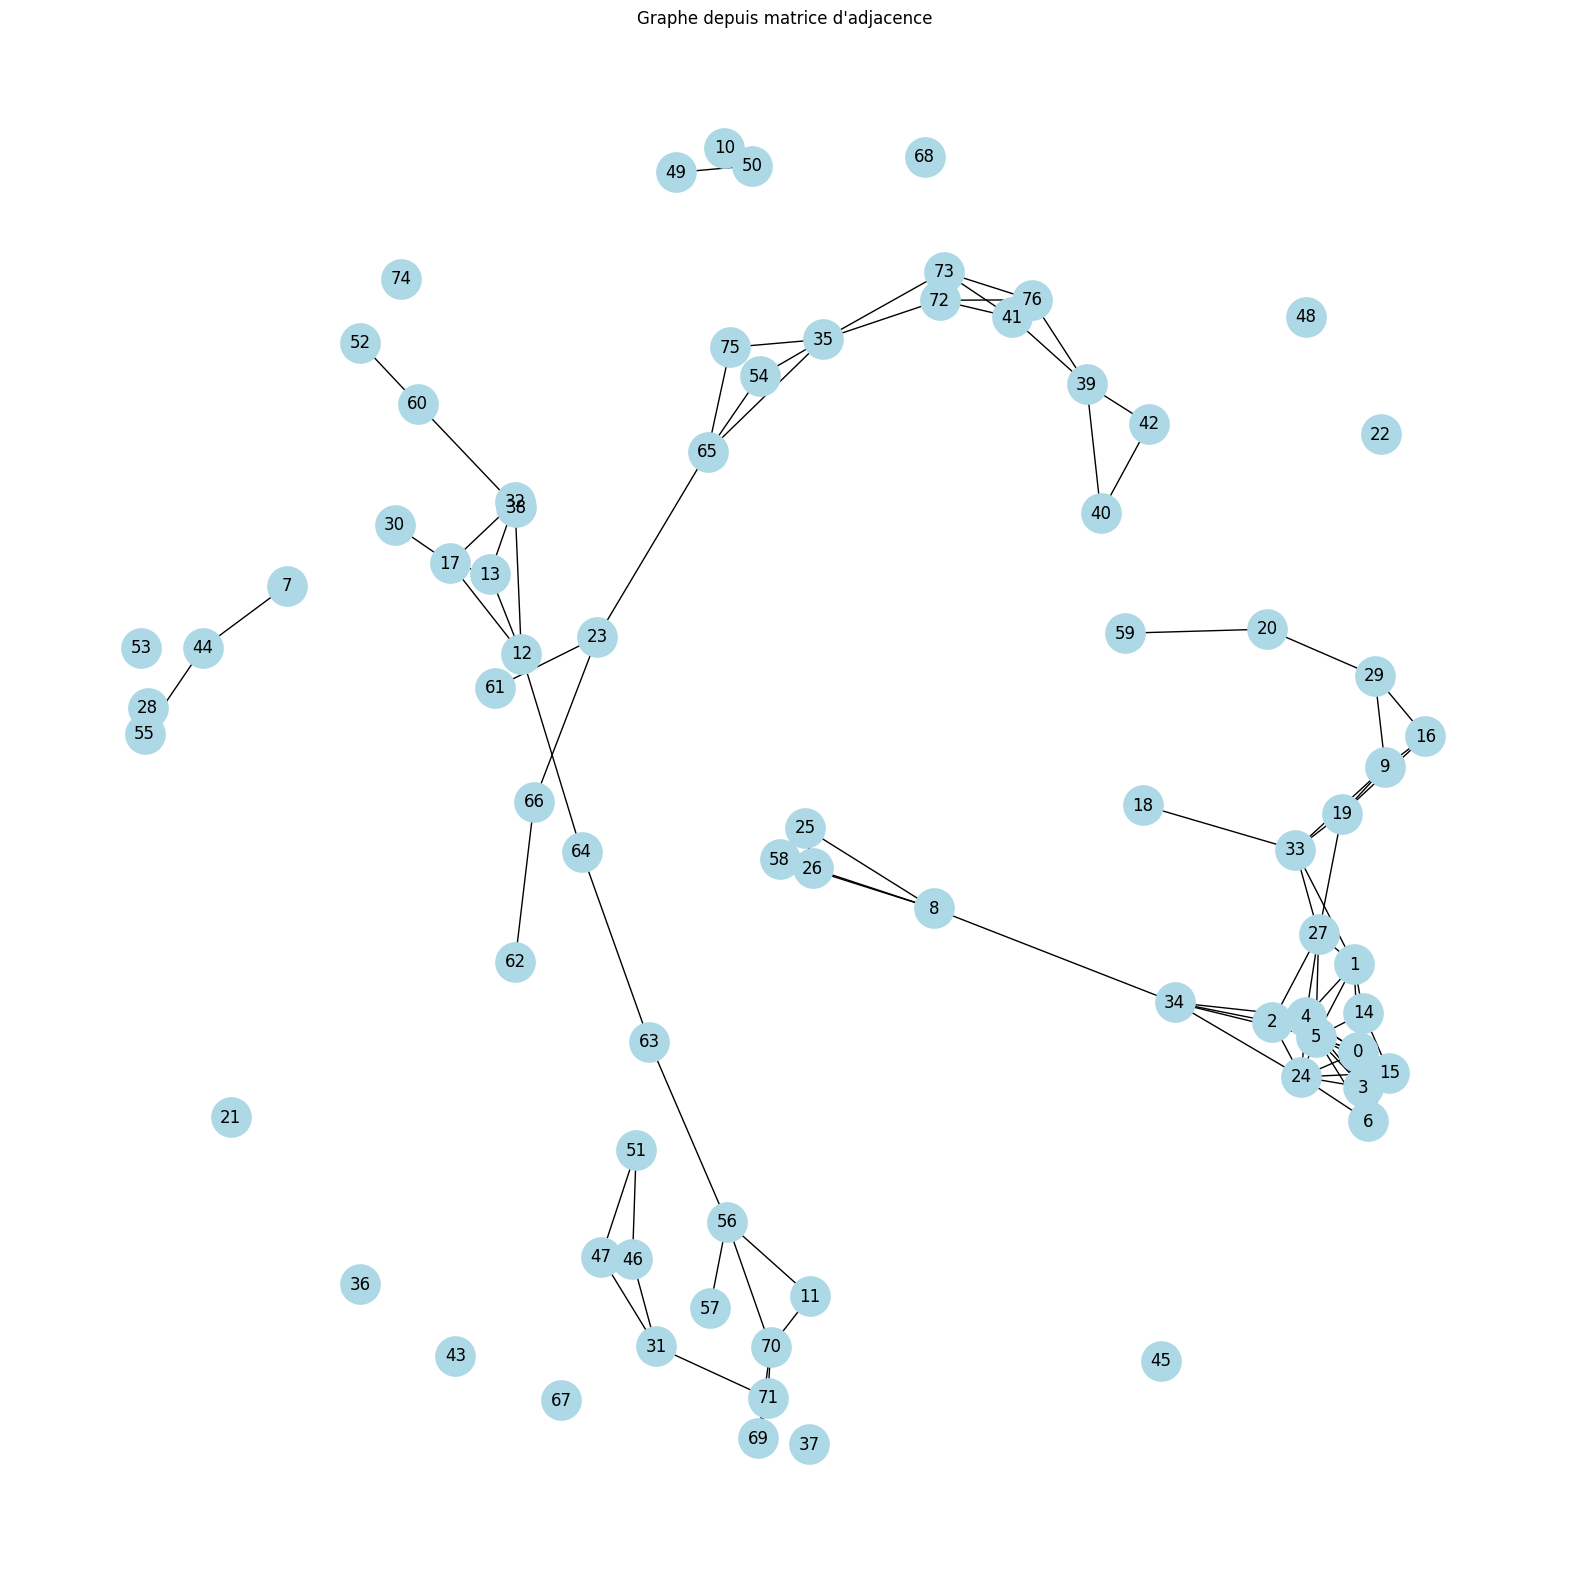

[[0.      0.95959 0.96229 ... 0.      0.      0.     ]
 [0.95959 0.      0.      ... 0.      0.      0.     ]
 [0.96229 0.      0.      ... 0.      0.      0.     ]
 ...
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]]


In [5]:
def emb_to_graph(
        weights:np.ndarray,
        encoder:List
):
    
    adjacency_matrix = cosine_similarity(weights)

    thresh = np.quantile(adjacency_matrix, 0.95) # We can keep more link 
    adj_t = adjacency_matrix.copy()
    adj_t[adj_t < thresh] = 0

    adj_t = adj_t.round(5)

    np.fill_diagonal(adj_t, 0)

    mapping = encoder

    _, ax = plt.subplots(figsize = (20, 20))
    G = nx.from_numpy_array(adj_t)
    G = nx.relabel_nodes(G, mapping)
    nx.write_gexf(G, "test.gexf")
    pos = nx.spring_layout(G, dim=2, k=0.8, iterations=200)
    weights_graph = [G[u][v].get('weight', 1) for u, v in G.edges()]

    pos = {n: 10.0 * coords for n, coords in pos.items()}
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, ax=ax)
    # nx.draw_networkx_edge_labels(G, pos, ) #, edge_labels=nx.get_edge_attributes(G, 'weight'))

    
    plt.title('Graphe depuis matrice d\'adjacence')
    plt.show()

    return adj_t, adjacency_matrix

word_weights:np.ndarray = torch.load("../SGNS_weights/" + "word_embedding.pt").numpy()
decoder  = JsonToDic("../" +"data/decoder")
am , adjacency_matrix= emb_to_graph(word_weights, decoder)
print(am)

In [ ]:
def project_and_plot(embeddings, encoder:dict, decoder:dict, dirs_words:List[str], top_n:int=200, plotly:bool=True):
    """
    embeddings: np.ndarray (V,D) or torch.Tensor (V,D)
    vocab: list of V tokens
    dirs_words: list of 2 or 3 tokens (must be in vocab)
    top_n: how many labels to display (highest |x|+|y|(+|z|)
    interactive: True -> plotly, False -> matplotlib
    """

    if isinstance(embeddings, torch.Tensor):
        embs = embeddings.detach().cpu().numpy()
    else:
        embs = np.asarray(embeddings)

    embs = normalize(embs)

    V, D = embs.shape
    assert len(dirs_words) in (2, 3), "dirs_words must be 2 or 3 tokens"
    for w in dirs_words:
        assert w in encoder.keys(), f'can t encode word {w} '
    
    anchors_list = []
    for item in dirs_words:
        w = item
        if w not in encoder:
            raise ValueError(f"direction token '{w}' not in vocab")
        anchors_list.append(embs[encoder[w]])
    anchors = np.stack(anchors_list, axis=0)  # (k, D)

    # center embeddings and anchors by global mean (centrage des vecteurs)
    mean_all = embs.mean(axis=0)
    embs_c = embs - mean_all
    anchors_c = anchors - mean_all

    # orthogonalize anchors via Gram-Schmidt and normalize
    def gram_schmidt(vecs):
        ortho = []
        for v in vecs:
            w = v.copy()
            for u in ortho:
                w = w - np.dot(w, u) * u
            norm = np.linalg.norm(w)
            if norm < 1e-8:
                continue
            ortho.append(w / norm)
        return np.stack(ortho, axis=0)
    
    dirs = gram_schmidt(anchors_c)  # (k_eff, D)
    k = dirs.shape[0]
    if k < len(dirs_words):
        # some directions were collinear; that's fine, continue with fewer axes
        pass

    # project
    coords = embs_c.dot(dirs.T)  # (V, k)
    mags = np.sum(np.abs(coords), axis=1)
    order = np.argsort(-mags)[:min(top_n, V)]
    xs = coords[order, 0]
    ys = coords[order, 1]
    labels = [decoder[i] for i in order]
    zs = coords[order, 2] if dirs.shape[0] == 3 else None

    if plotly:
        if zs is None:
            fig = go.Figure(data=go.Scatter(
                x=xs, y=ys, mode='markers+text',
                text=labels, textposition='top center',
                marker=dict(size=6, opacity=0.8)
            ))
            fig.update_layout(
                xaxis_title=str(dirs_words[0]),
                yaxis_title=str(dirs_words[1]),
                title="Projection 2D"
            )
        else:
            fig = go.Figure(data=go.Scatter3d(
                x=xs, y=ys, z=zs, mode='markers+text',
                text=labels, textposition='top center',
                marker=dict(size=4, opacity=0.8)
            ))
            fig.update_layout(
                scene=dict(
                    xaxis_title=str(dirs_words[0]),
                    yaxis_title=str(dirs_words[1]),
                    zaxis_title=str(dirs_words[2])
                ),
                title="Projection 3D"
            )
        fig.show()

    else :
        plt.figure(figsize=(9,7))
        plt.scatter(xs, ys, s=8, alpha=0.7)
        for i, lab in enumerate(labels):
            plt.annotate(lab, (xs[i], ys[i]), fontsize=9)
        plt.axhline(0, color='gray', linewidth=0.5)
        plt.axvline(0, color='gray', linewidth=0.5)
        plt.xlabel(f"dir: {dirs_words[0]}")
        plt.ylabel(f"dir: {dirs_words[1]}")
        plt.title("Projection 2D sur directions indiquées")
        plt.show()



In [ ]:
project_and_plot(word_weights, encoder=encoder, decoder=decoder, dirs_words=["chat", 'jouer'], plotly=True)

In [ ]:
cos = cosine_similarity(word_weights[encoder["chat"]].reshape(1, -1), word_weights[encoder["caresse"]].reshape(1, -1))[0,0]
print(cos)
cos = cosine_similarity(word_weights[encoder["jouer"]].reshape(1, -1), word_weights[encoder["caresse"]].reshape(1, -1))[0,0]
print(cos)

In [ ]:
# Generate by GPT 5 (et modifié par moi)

# Vecteurs de référence
v_chien = word_weights[encoder['chien']]
v_chat = word_weights[encoder['chat']]

# === Étape 1 : Gram-Schmidt pour orthogonaliser ===
u1 = v_chien
proj = (np.dot(v_chat, u1) / np.dot(u1, u1)) * u1
u2 = v_chat - proj

# Normalisation
e1 = u1 / np.linalg.norm(u1)
e2 = u2 / np.linalg.norm(u2)

# === Étape 2 : Projection de tous les mots ===
coords = []
for mot, idx in encoder.items():
    v = word_weights[idx]
    x = np.dot(v, e1)
    y = np.dot(v, e2)
    coords.append((mot, x, y))

# === Étape 3 : Visualisation ===
plt.figure(figsize=(8,8))
for mot, x, y in coords:
    plt.scatter(x, y, color='steelblue')
    plt.text(x+0.002, y+0.002, mot, fontsize=9)

plt.xlabel("Axe 'chien' orthonormalisé")
plt.ylabel("Axe 'chat' orthonormalisé")
plt.title("Projection des embeddings selon ('chien', 'chat') orthogonalisés")
plt.grid(True)
plt.show()


In [ ]:
mots_ref = ["chien", "chat", "train", "balle"]  # Pas limiter a 3


# Extraire les vecteurs
V = [word_weights[encoder[m]] for m in mots_ref]

# === Étape 1 : Gram-Schmidt pour orthogonaliser ===
E = []
for v in V:
    u = v.copy()
    for e in E:
        u -= np.dot(u, e) * e
    u = u / np.linalg.norm(u)
    E.append(u)

# === Étape 2 : Projection des mots ===
X, Y, Z, labels = [], [], [], []

for mot, idx in encoder.items() :
    v = word_weights[idx]
    # projection sur les 3 premiers axes de la base orthonormée
    proj = [np.dot(v, e) for e in E[:3]]
    X.append(proj[0])
    Y.append(proj[1])
    Z.append(proj[2])
    labels.append(mot)

fig = go.Figure(data=[
    go.Scatter3d(
        x=X, y=Y, z=Z,
        mode='markers+text',
        text=labels,
        textposition="top center",
        marker=dict(size=4, color='steelblue', opacity=0.7)
    )
])

fig.update_layout(
    scene=dict(
        xaxis_title=f"Axe 1 ({mots_ref[0]})",
        yaxis_title=f"Axe 2 ({mots_ref[1]})",
        zaxis_title=f"Axe 3 ({mots_ref[2]})",
    ),
    title="Projection orthonormée des embeddings Word2Vec (Plotly 3D)",
    width=900, height=800
)

fig.show()
